In [3]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np

In [4]:
cell_size = (1,1,0)

boundary_layer = [
    mp.PML(0.3, mp.X),
    mp.PML(0.3, mp.Y)
                  ]

In [5]:
resolution = 100
nfreq = 100

# 파장 범위 설정 (단위: μm)
lambda_min = 0.4002
lambda_max = 0.7005
# lambda_cen = 0.55

fmin = 1 / lambda_max
fmax = 1 / lambda_min
fcen = 0.5 * (fmin + fmax)

df = fmax - fmin

In [6]:
source_center = mp.Vector3(0,0,0)
sources = [mp.Source(
    src=mp.GaussianSource(frequency=fcen, fwidth=df),
    component=mp.Ey,
    center=source_center,
    size=mp.Vector3(0,0)
)]

In [7]:
sim = mp.Simulation(
    cell_size=cell_size,
    default_material=mp.Medium(index=1),
    boundary_layers=boundary_layer,
    sources=sources,
    resolution=resolution
)

In [8]:
offset = 0.01
flux_size = 0.02
source_center = mp.Vector3(0,0,0)

box_power = sim.add_flux(
    fcen, df, nfreq,
    mp.FluxRegion(center=source_center - mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size),
                  # direction=mp.Y, 
                  weight=-1),
    mp.FluxRegion(center=source_center + mp.Vector3(offset, 0, 0),
                  size=mp.Vector3(0, flux_size),
                  # direction=mp.Y
                ),
    mp.FluxRegion(center=source_center - mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0),
                  # direction=mp.Y, 
                  weight=-1),
    mp.FluxRegion(center=source_center + mp.Vector3(0, offset, 0),
                  size=mp.Vector3(flux_size, 0),
                  # direction=mp.Y
                  )
)

<Axes: xlabel='X', ylabel='Y'>

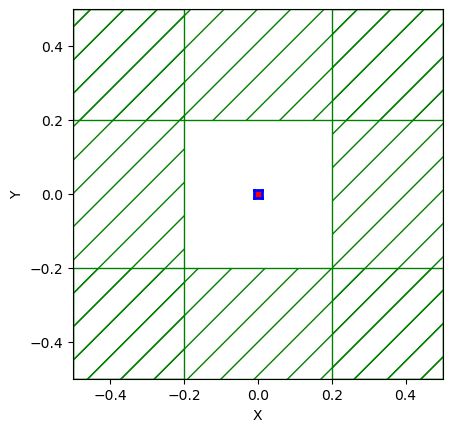

In [9]:
sim.plot2D()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000262976 s
Working in 2D dimensions.
Computational cell is 1 x 1 x 0 with resolution 100
time for set_epsilon = 0.00571299 s
-----------
run 0 finished at t = 50.0 (10000 timesteps)
λ (μm)		net dipole power (W)
0.7005		5.235750e-06
0.6952		8.055623e-06
0.6900		1.220064e-05
0.6849		1.845975e-05
0.6799		2.752246e-05
0.6749		4.079269e-05
0.6700		5.967359e-05
0.6652		8.661311e-05
0.6605		1.242860e-04
0.6558		1.768702e-04
0.6511		2.492034e-04
0.6466		3.482369e-04
0.6421		4.823048e-04
0.6377		6.626138e-04
0.6333		9.028367e-04
0.6290		1.220359e-03
0.6247		1.636496e-03
0.6205		2.177032e-03
0.6164		2.873457e-03
0.6123		3.762099e-03
0.6083		4.886890e-03
0.6043		6.296151e-03
0.6004		8.047511e-03
0.5965		1.020116e-02
0.5927		1.282773e-02
0.5889		1.599661e-02
0.5852		1.978773e-02
0.5815		2.427361e-02
0.5779		2.953607e-02
0.5743		3.564069e-02
0.5707		4.265981e-02
0.5672		5.063829e-02
0.5638		5.962427e-02
0.5603		6.962568e-02
0.

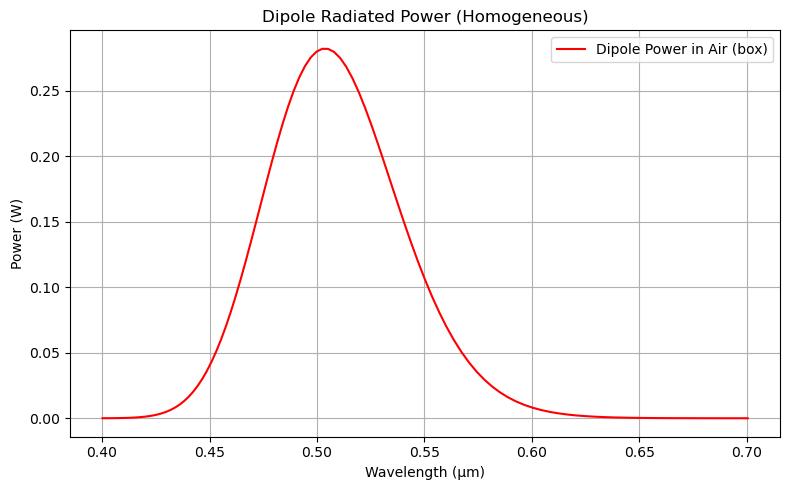

In [10]:
sim.init_sim()
# === 시뮬레이션 실행 ===
sim.run(until=50)
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(), 1e-8))

# === 측정된 flux 데이터 얻기 ===
flux_freqs = mp.get_flux_freqs(box_power)   # 측정된 주파수 배열 (1/μm)
net_power = mp.get_fluxes(box_power)        # 측정된 각 주파수의 dipole 방사 power (W)

# === 파장으로 변환 (μm)
wavelengths = 1 / np.array(flux_freqs)

# === 결과 출력 예시
print("λ (μm)\t\tnet dipole power (W)")
for i in range(nfreq):
    print(f"{wavelengths[i]:.4f}\t\t{net_power[i]:.6e}")

# === 시각화 (옵션)
plt.figure(figsize=(8,5))
plt.plot(wavelengths, net_power, label="Dipole Power in Air (box)", color = 'red')
plt.xlabel("Wavelength (μm)")
plt.ylabel("Power (W)")
plt.title("Dipole Radiated Power (Homogeneous)")
# plt.ylim([-3, 14])
# plt.xlim([,2])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
import csv

# 저장할 파일 경로
filename = "dipole_power.csv"

# CSV로 저장
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Wavelength (μm)", "Power (W)"])  # 헤더
    for wl, power in zip(wavelengths, net_power):
        writer.writerow([wl, power])

print(f"CSV 파일 저장 완료: {filename}")

CSV 파일 저장 완료: dipole_power.csv
